<p style="text-align:center"><span style="font-size:36px"><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Analiza i prognozowanie szereg&oacute;w czasowych <br />na przykładzie rzeczywistych danych z punktu gastronomicznego</strong></span></span></p>

<p style="text-align:center"></p>

<h2><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Cel prezentacji:</strong></span></h2>

<ul>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">przedstawienie proces&oacute;w podejmowania decyzji w trakcie analizy danych</span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">użycie rzeczywistych danych </span>
	<ul>
		<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">celem odwzorowania realnych problem&oacute;w występujacych przy analizie</span></li>
		<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">dalszego rozowoju modelu w celach badawczo-rozwojowych przedsiebiostwa </span></li>
	</ul>
	</li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">podobny zbi&oacute;r metod do analizy danych i prognoz mogących być używanymi w&nbsp; PSE (<a href="https://ekordo.pl/prognoza-zuzycia-energii-elektrycznej/">https://ekordo.pl/prognoza-zuzycia-energii-elektrycznej/</span></a>)</li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">odmienna dziedzina zastosowania metod</span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">względnie prosty i mały zestaw danych umożliwiających ich edycję i przetwarzanie w czasie rzeczywistym w prezentacji</span></li>
</ul>



<p></p>


<p style="text-align:center"></p>

<h2><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Opis problemu analitycznego:</strong><a class="anchor-link" href="http://localhost:8888/notebooks/Desktop/PSE/Prezentacja%20PSE.ipynb#Opis-problemu-analitycznego:">&para;&nbsp;</a></span></h2>

<ul>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"> dane stanowią rachunki z systemu POS Bistro zawierające kwotę brutto, czas i datę</span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"> celem analizy jest dostarczenie przedsiębiorcy:</span>
	<ul>
		<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"> prognoz przepływ&oacute;w pieniężnych</span></li>
		<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"> prog&oacute;w kwotowych do określenia opłacalności otwarcia lokalu w danym dniu tygodnia oraz jego wynajmu </span>/li>
		<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"> wskazania dni do testowania przychodu w funkcji ilości pracownik&oacute;w lokalu</span></li>
	</ul>
	</li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"> założono, że model będzie aktualizowany i stosowany w okresie miesięcznym</span></li>
</ul>


<p style="text-align:center">&nbsp;</p>
<span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">
<h2><strong>Wykorzystane model analityczne:</strong></h2>

<ol>
	<li>Naiwne - por&oacute;wnwcze</li>
	<li>Złożona średnia ruchoma - metoda referencyjna </li>
	<li>SARIMA i SARIMAX </li>
	<li> ML Random Forest </li>
</ol>
</span>
<p>&nbsp;</p>


<p style="text-align:center">&nbsp;</p>

<p><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Wykorzystane narzędzia w projekcie:</strong></span></p>

<ol>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">IDE oraz prezentacji<strong>:</strong></span><span style="font-family:Courier New,Courier,monospace"> jupyter notebook, nbextensions, RISE</span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">Podstawowa manipulacja danymi: </span><span style="font-family:Courier New,Courier,monospace">sys, os, pandas, numpy</span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">EDA : </span><span style="font-family:Courier New,Courier,monospace">ydata_profiling </span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">Modele SARIMA i SARMIAX: </span><span style="font-family:Courier New,Courier,monospace">statsmodels, pmdarima</span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">Model ML i metryki błędu: </span><span style="font-family:Courier New,Courier,monospace">sklearn, mlforecast</span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">Narzędzia graficzne: </span><span style="font-family:Courier New,Courier,monospace">seaborn</span><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">, </span><span style="font-family:Courier New,Courier,monospace">matplotlib</span></li>
	
</ol>

<p>&nbsp;</p>


In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Wczytanie pakietów do IDE
import os
import os
import pandas as pd
import numpy as np
import pmdarima as pm
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import datetime
import mlforecast



from statsmodels.tsa.stattools import adfuller
from ydata_profiling import ProfileReport
from datetime import datetime




<p style="text-align:center"></p>
<span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">
<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Wstępna obr&oacute;bka danych </strong></span></h3>

<h4><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Problemy</strong></span></h4>

<ul>
	<li>godziny rachunk&oacute;w wykazane w bazie są nieadekwatne do rzeczywistości
	<ul>
		<li>np. po teretycznym zamknięciu o&nbsp; godz. 0:04 nastąpił wydano jeden rachunek na kwotę ponad 50% utargu dnia poprzedniego</li>
		<li>wynika to:
		<ul>
			<li>z powodu podliczania got&oacute;wki i rejestrowania jej zbiorczo pod jedną pozycją</li>
			<li>zamykania pojedynczych otwartych rachunk&oacute;w i rozliczania ich zbiorczo przed zamknięciem pod jedną pozycją</li>
			<li>potencjalnych imprez zamkniętych rozliczanych pod jedną pozycją</li>
		</ul>
		</li>
	</ul>
	</li>
</span>

<p style="text-align:center">&nbsp;</p>
<span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">
<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Wstępna obr&oacute;bka danych </strong></span></h3>

<h4><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Problemy</strong></span></h4>

<ul>
	<li>system POS Bistro ma źle zaimplementowaną obsługę błęd&oacute;w:
	<ul>
		<li>nie informuje o przekroczeniu limitu 20000 wierszy i obcina resztę danych</li>
		<li>z tego powodu dane wejściowe znajdują się w wielu plikach *.xlsx</li>
	</ul>
	</li>
</ul>
</span>

<p>&nbsp;</p>


In [3]:
#Wczytanie serii plików *.xlsx z POS BISTRO
bills_path = '/Users/admin/Desktop/PSE/data/rach/'
filenames_bills = [bills_file for bills_file in os.listdir(bills_path) if bills_file.endswith('.xlsx')]
bills_df = pd.concat([pd.read_excel(bills_path + bills_file) for bills_file in filenames_bills], ignore_index=True)
bills_df.head(3)
 

,Data,Godzina,Cena brutto
0,2018-12-31,23:58,31.5
1,2018-12-31,23:53,36.0
2,2018-12-31,23:46,150.3


In [4]:
#Ustalenie odpowiednich typów danych do analizy
bills_df['Data']=pd.to_datetime(bills_df['Data'])
bills_df['Cena_brutto']=bills_df['Cena brutto']
bills_df['Godzina']=pd.to_datetime(bills_df['Godzina'], format='%H:%M') - pd.to_datetime(bills_df['Godzina'], format='%H:%M').dt.normalize()
bills_df['Data'] = pd.to_datetime(bills_df['Data']) + pd.to_timedelta(bills_df['Godzina'])
bills_df=bills_df.drop(['Godzina','Cena brutto'], axis=1)
bills_df.dtypes



Data           datetime64[ns]
Cena_brutto           float64
dtype: object

In [5]:

bills_df

,Data,Cena_brutto
0,2018-12-31 23:58:00,31.5
1,2018-12-31 23:53:00,36.0
2,2018-12-31 23:46:00,150.3
3,2018-12-31 23:36:00,27.0
4,2018-12-31 23:36:00,8.0
...,...,...
80084,2023-01-01 00:41:00,13.0
80085,2023-01-01 00:39:00,7.0
80086,2023-01-01 00:35:00,20.0
80087,2023-01-01 00:11:00,14.0


In [6]:
#Agregacja danych do rodzielczości
utarg_dzienny=(bills_df.groupby([pd.Grouper(key = 'Data', freq = 'D')])
.agg(Utarg_dzienny = ('Cena_brutto' , 'sum'))
)


<p style="text-align:center"></p>

<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Wstępna obr&oacute;bka danych </strong></span></h3>

<h4><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Problemy - wartości zerowe </strong></span></h4>





<AxesSubplot: xlabel='Data', ylabel='Utarg_dzienny'>

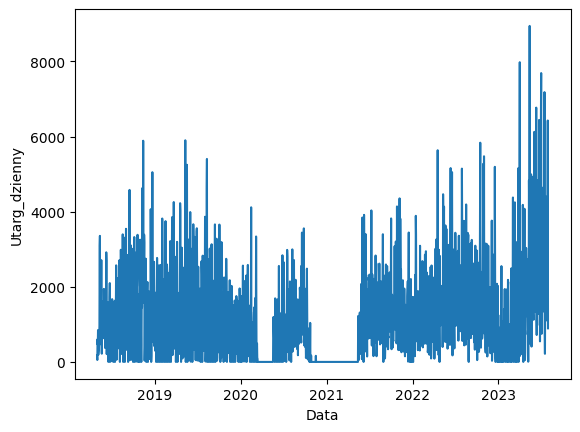

In [7]:
sns.lineplot(x="Data",y='Utarg_dzienny',
             data=utarg_dzienny)


In [8]:
# usunięcie brakującyh dat i przesunięcie czasu w 12h w tył - kolumnna 'Przesunięta_data'
mod = bills_df.loc[(bills_df != 0).any(axis=1)]
mod['Przesunięta_data']=mod['Data']-np.timedelta64(12,'h')

In [9]:
#wstawienie kolumny jako index do sortowania  - metoda resample
mod.index = pd.to_datetime(mod.index)
mod=mod.set_index(pd.DatetimeIndex(mod['Przesunięta_data']))
mod.drop(['Przesunięta_data', 'Data'], axis=1)

,Cena_brutto
Przesunięta_data,
2018-12-31 11:58:00,31.5
2018-12-31 11:53:00,36.0
2018-12-31 11:46:00,150.3
2018-12-31 11:36:00,27.0
2018-12-31 11:36:00,8.0
...,...
2022-12-31 12:41:00,13.0
2022-12-31 12:39:00,7.0
2022-12-31 12:35:00,20.0


In [10]:
#agregacja do jednego dnia i usunięcie wierszy z zerowymi utargami 
rachunki_df=mod.resample('D').Cena_brutto.sum()
rachunki_df = rachunki_df.to_frame().reset_index()
rachunki_df= rachunki_df[rachunki_df['Cena_brutto'] != 0]
rachunki_df=rachunki_df.rename(columns={'Cena_brutto':'Utarg_dzienny'})
rachunki_df


,Przesunięta_data,Utarg_dzienny
0,2018-05-01,181.00
1,2018-05-02,52.00
2,2018-05-03,603.35
3,2018-05-04,558.20
4,2018-05-05,763.00
...,...,...
1913,2023-07-27,1356.73
1914,2023-07-28,868.70
1915,2023-07-29,8359.70
1916,2023-07-30,1746.80


<p style="text-align:center"></p>

<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Wstępna obr&oacute;bka danych </strong></span></h3>

<h4><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Problemy - wartości zerowe </strong></span></h4>





<AxesSubplot: xlabel='Przesunięta_data', ylabel='Utarg_dzienny'>

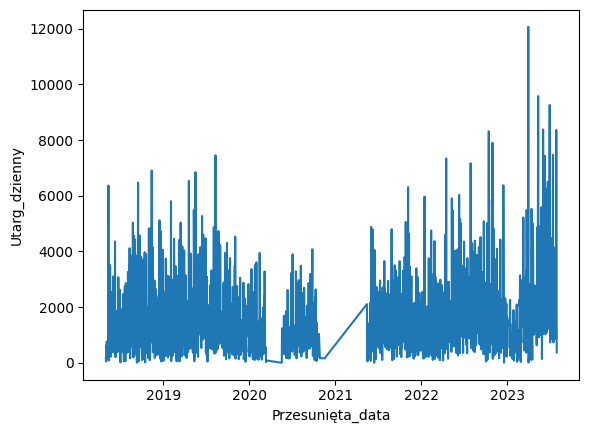

In [11]:
#Wykres utargu po usunięciu wartości zerowych
sns.lineplot(x="Przesunięta_data",y='Utarg_dzienny',
             data=rachunki_df)


In [12]:
#dodatnie kolumn z numerami tygodnia roku, miesiąca,dni tygodnia - wartość 0 odpowiada poniedziałkowi,a 6 niedzieli oraz roku
rachunki_df['nr_tygodnia'] = rachunki_df.Przesunięta_data.apply(lambda x: x.weekofyear)
rachunki_df['nr_miesiaca'] = rachunki_df.Przesunięta_data.apply(lambda x: x.month)
rachunki_df['dzien_tygodnia'] = rachunki_df.Przesunięta_data.apply(lambda x: x.dayofweek)
rachunki_df['rok'] = rachunki_df.Przesunięta_data.apply(lambda x: x.year)
#EDA
profile = ProfileReport(rachunki_df, title="EDA dla utargów dziennych V.2018-VII.2023")


<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Charakterystyka danych (EDA) - poziom deskryptywny</strong></span></h3>





In [13]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h2><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Modele refencyjne</strong></span></h2>
<span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">
<ul>
	<li><strong>Modele naiwne</strong>
	<ul>
		<li>średnia rocznia</li>
		<li>średnia historyczna</li>
		<li>pow&oacute;trzenie zeszłorocznego szeregu czasowego</li>
		<li>średniej dzienna z całego dyzpozycyjnego szeregu czasowego</li>
	</ul>
	</li>
	<li><strong>Modele złożonej średnia ruchomej - średnia dla dnia tygodnia dla każdego tygodnia roku:</strong>
	<ul>
		<li>dla ostatniego dwurocznego szeregu czasowego - postCOVID</li>
        <li>dla ostatniego rocznego szeregu czasowego - postCOVID</li>
		<li>dla całego dyzpozycyjnego szeregu czasowe</li>
	</ul>
	</li>
</ul>
</span>
<h3>&nbsp;</h3>


In [14]:
#zbiór testowy - lipiec 2023
test_df=rachunki_df[rachunki_df['Przesunięta_data']>="2023-07-01"]
#zbiór uczący cały - do lipca 2023
baza_df=rachunki_df[rachunki_df['Przesunięta_data']<"2023-07-01"]
#zbiór uczący roczny - od lipca 2022 do lipca 2023
baza_last_df=baza_df[baza_df['Przesunięta_data']>="2022-07-01"]
#zbiór uczący dwuletni po Covidzie - od lipca 2021 do lipca 2023
baza_2rok_df=baza_df[baza_df['Przesunięta_data']>="2021-07-01"]
#zbiór uczący dwuletni po Covidzie - od lipca 2022 do lipca 2023
baza_1rok_df=baza_df[baza_df['Przesunięta_data']>="2022-07-01"]
#Powtórzenie ostatniego szergu czasowego
baza_last_df=baza_last_df.drop(['nr_tygodnia','dzien_tygodnia','rok','nr_miesiaca'], axis=1)
baza_last_df['Przesunięta_data']=baza_last_df['Przesunięta_data'].values.astype('datetime64[D]')
baza_last_df['Przesunięta_data']=baza_last_df['Przesunięta_data']+np.timedelta64(1,'Y')
baza_last_df=baza_last_df[baza_last_df['Przesunięta_data']<="2023-07-31"]
baza_last_df=baza_last_df.rename(columns={'Utarg_dzienny': "Utarg_2022"})
#Średnia ruchoma dla całego okresu
prognoza_df=baza_df.groupby(['nr_tygodnia', 'dzien_tygodnia'])['Utarg_dzienny'].mean().to_frame()
prognoza_df.reset_index()
prognoza_df=prognoza_df.rename(columns={"Utarg_dzienny":"Prognozowany_utarg_dzienny_MA"}).reset_index()
#Tablica zbiorcza
ref_df = pd.merge(test_df, prognoza_df,  how='left', on=['nr_tygodnia','dzien_tygodnia'])
ref_df = pd.merge(ref_df, baza_last_df,  how='left', on=['Przesunięta_data'])
#Średnia historyczna
ref_df['Średnia_historyczna']=baza_df['Utarg_dzienny'].mean()
#Średnia roczna
ref_df['Średnia_roczna']=baza_last_df["Utarg_2022"].mean()
#Średnia roczna
baza_df['dzień_roku'] = rachunki_df.Przesunięta_data.apply(lambda x: x.dayofyear)
baza_hist_df=baza_df.drop(['nr_tygodnia','dzien_tygodnia','rok','nr_miesiaca'], axis=1)
baza_hist_df=baza_df.groupby(['dzień_roku'])['Utarg_dzienny'].mean().to_frame()
baza_hist_df=baza_hist_df.rename(columns={"Utarg_dzienny":"Średnia_dzienna"}).reset_index()

In [15]:
#Średnia ruchoma dla okresu 2-letniego
prognoza_2rok_df=baza_2rok_df.groupby(['nr_tygodnia', 'dzien_tygodnia'])['Utarg_dzienny'].mean().to_frame()
prognoza_2rok_df=prognoza_2rok_df.rename(columns={'Utarg_dzienny':"Prognozowany_utarg_dzienny_MA_2roczny"}).reset_index()
#Średnia ruchoma dla okresu 1-letniego
prognoza_1rok_df=baza_1rok_df.groupby(['nr_tygodnia', 'dzien_tygodnia'])['Utarg_dzienny'].mean().to_frame()
prognoza_1rok_df=prognoza_1rok_df.rename(columns={'Utarg_dzienny':"Prognozowany_utarg_dzienny_MA_1roczny"}).reset_index()

#Atualizacja tablicy zbiorczej
ref_df['dzień_roku'] = ref_df.Przesunięta_data.apply(lambda x: x.dayofyear)
ref_df = pd.merge(ref_df, baza_hist_df,  how='left', on=['dzień_roku'])
ref_df = pd.merge(ref_df, prognoza_2rok_df,  how='left', on=['nr_tygodnia','dzien_tygodnia'])
ref_df = pd.merge(ref_df, prognoza_1rok_df,  how='left', on=['nr_tygodnia','dzien_tygodnia'])


ref_df.head(5)

,Przesunięta_data,Utarg_dzienny,nr_tygodnia,nr_miesiaca,dzien_tygodnia,rok,Prognozowany_utarg_dzienny_MA,Utarg_2022,Średnia_historyczna,Średnia_roczna,dzień_roku,Średnia_dzienna,Prognozowany_utarg_dzienny_MA_2roczny,Prognozowany_utarg_dzienny_MA_1roczny
0,2023-07-01,9258.0,26,7,5,2023,3066.400000,1659.55,1584.937933,2020.445161,182,984.0125,2505.70,4352.0
1,2023-07-02,1758.8,26,7,6,2023,600.340000,4352.00,1584.937933,2020.445161,183,1490.4300,955.45,1376.0
2,2023-07-03,731.0,27,7,0,2023,630.066667,1376.00,1584.937933,2020.445161,184,1202.1800,935.10,1225.2
3,2023-07-04,1367.4,27,7,1,2023,792.840000,1225.20,1584.937933,2020.445161,185,1561.7600,1019.35,913.8
4,2023-07-05,2715.0,27,7,2,2023,1970.880000,913.80,1584.937933,2020.445161,186,1232.6600,2417.05,2749.4


<h4><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Modele refencyjne - wyniki poziomu prognostycznego</strong></span></h4>




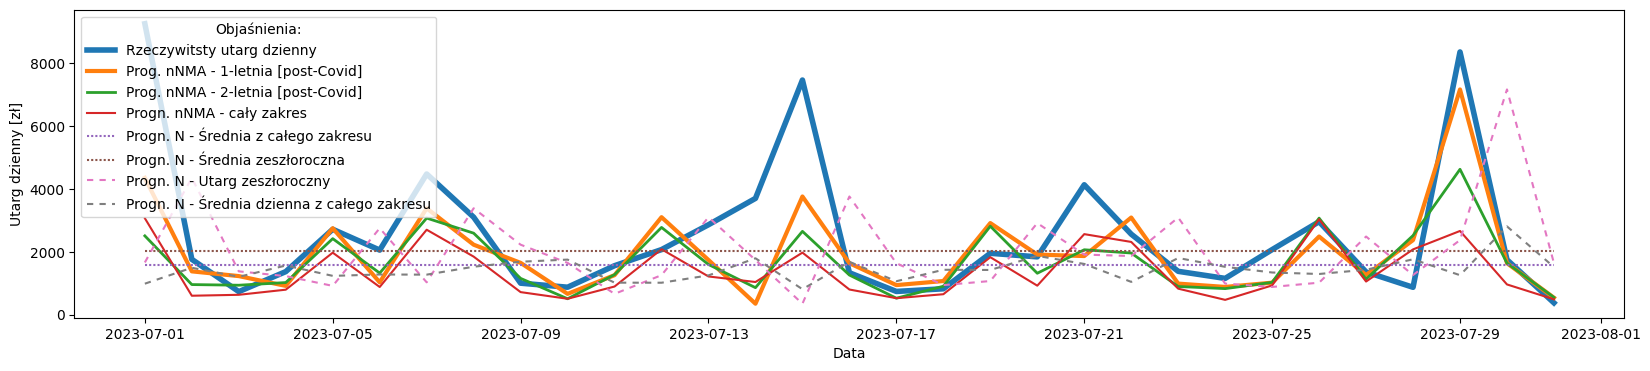

In [16]:
#Rysowanie wykresu
plt.figure(figsize=(20,4))
sns.lineplot(x='Przesunięta_data', y='Utarg_dzienny',data=ref_df, linewidth=4,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Prognozowany_utarg_dzienny_MA_1roczny', data=ref_df, linewidth=3,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Prognozowany_utarg_dzienny_MA_2roczny', data=ref_df, linewidth=2,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Prognozowany_utarg_dzienny_MA', data=ref_df, errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Średnia_historyczna', data=ref_df,dashes=(1, 1),errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Średnia_roczna', data=ref_df, dashes=(1, 1),errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Utarg_2022', data=ref_df, dashes=(3, 3),errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Średnia_dzienna', data=ref_df, dashes=(3, 3),errorbar=None)
plt.ylabel("Utarg dzienny [zł]")
plt.xlabel("Data")
plt.legend(title='Objaśnienia:', loc='upper left', labels = ['Rzeczywitsty utarg dzienny','Prog. nNMA - 1-letnia [post-Covid]','Prog. nNMA - 2-letnia [post-Covid]','Progn. nNMA - cały zakres','Progn. N - Średnia z całego zakresu','Progn. N - Średnia zeszłoroczna' ,'Progn. N - Utarg zeszłoroczny','Progn. N - Średnia dzienna z całego zakresu'])
plt.show()

<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Modele refencyjne - wyb&oacute;r modelu</strong></span></h3>

<ul>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>MAPE </strong>do przewidywania </span>zamknięć i prog&oacute;w koszt&oacute;w imprez zamkniętych; większy wsp&oacute;łczynnik błędu dla przeszacowań</li>
     <img src="mape.png" width="300" height="300" align='center'>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>RMSLE </strong>do przewidywania dni testowych do obsadzeń załogi; </span>większy wsp&oacute;łczynnik błędu dla niedoszacowań</li>
     <img src="RMSLE.png" width="400" height="400" align='center'>    
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>MedAE </strong>do przewidywania przepływ&oacute;w pieniężnych; </span>symetryczna miara bezwględna odporna na wartości odstające</li>
     <img src="MeAE.png" width="500" height="500" align='center'>   
</ul>

<h3>&nbsp;</h3>



<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Model refencyjny - wybór modelu</strong></span></h3>



In [17]:
#wyznaczenie metryk błedu dla wszystkich modeli
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
columns =['Prognozowany_utarg_dzienny_MA', 'Utarg_2022', 'Średnia_historyczna','Średnia_roczna', 'Średnia_dzienna','Prognozowany_utarg_dzienny_MA_2roczny','Prognozowany_utarg_dzienny_MA_1roczny']
MAPE_score=[]
RMSLE_score=[]
MeAE_score=[]
for col in columns:
    MAPE_score.append([(mean_absolute_percentage_error(ref_df['Utarg_dzienny'], ref_df[col])),col])
    RMSLE_score.append([(mean_squared_log_error(ref_df['Utarg_dzienny'], ref_df[col])),col])
    MeAE_score.append([(median_absolute_error(ref_df['Utarg_dzienny'], ref_df[col])),col])
print('MAPE: \n',sorted(MAPE_score)[0])
print('RMSLE: \n',sorted(RMSLE_score)[0])
print('MeAE: \n',sorted(MeAE_score)[0])

MAPE: 
 [0.3786949499963312, 'Prognozowany_utarg_dzienny_MA_2roczny']
RMSLE: 
 [0.3220106822241443, 'Prognozowany_utarg_dzienny_MA_2roczny']
MeAE: 
 [494.20000000000005, 'Prognozowany_utarg_dzienny_MA_1roczny']


<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Model refencyjny - poziom normatywny</strong></span></h3>
<span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Progi kwotowe oraz typowane dni do testów i zamknięcia</strong>



In [18]:
#porównianie modelu z rzeczywistymi utargami dla dni tygodnia 
utarg_dzien_tyg_prog=((ref_df.groupby(['dzien_tygodnia'])['Prognozowany_utarg_dzienny_MA_2roczny']).mean())
utarg_dzien_tyg_prog.to_frame()
utarg_dzien_tyg_real=((ref_df.groupby(['dzien_tygodnia'])['Utarg_dzienny']).mean())
utarg_dzien_tyg_real.to_frame()
utarg_lipiec_2023 = pd.merge(utarg_dzien_tyg_real, utarg_dzien_tyg_prog,  how='left', on='dzien_tygodnia')
utarg_lipiec_2023['Błąd']=(utarg_lipiec_2023['Utarg_dzienny']-utarg_lipiec_2023['Prognozowany_utarg_dzienny_MA_2roczny'])
utarg_lipiec_2023['Błąd_względny']=(utarg_lipiec_2023['Błąd'])/utarg_lipiec_2023['Prognozowany_utarg_dzienny_MA_2roczny']
utarg_lipiec_2023

,Utarg_dzienny,Prognozowany_utarg_dzienny_MA_2roczny,Błąd,Błąd_względny
dzien_tygodnia,,,,
0,772.9600,667.16000,105.80000,0.158583
1,1453.3000,1054.90000,398.40000,0.377666
2,2423.1500,2768.94250,-345.79250,-0.124883
3,2026.7825,1340.15625,686.62625,0.512348
4,3293.7150,2126.94625,1166.76875,0.548565
5,6148.8800,2866.36700,3282.51300,1.145182
6,1442.9400,1179.28500,263.65500,0.223572


<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Model refencyjny - poziom normatywny</strong></span></h3>
<span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Przepływy pieniężne</strong>

In [19]:
#porównianie modelu przepływów pieniężnych z rzeczywistymi
ref_df['Skumulowany_Prognozowany_utarg_dzienny_MA_1roczny']=ref_df['Prognozowany_utarg_dzienny_MA_1roczny'].cumsum()
ref_df['Skumulowany_Utarg_dzienny']=ref_df['Utarg_dzienny'].cumsum()
ref_df['Błąd']=(ref_df['Skumulowany_Utarg_dzienny']-ref_df['Skumulowany_Prognozowany_utarg_dzienny_MA_1roczny'])
ref_df['Błąd_względny']=(ref_df['Błąd']/ref_df['Skumulowany_Prognozowany_utarg_dzienny_MA_1roczny'])
ref_df.filter(items=['Przesunięta_data','Skumulowany_Utarg_dzienny', 'Skumulowany_Prognozowany_utarg_dzienny_MA_1roczny','Błąd','Błąd_względny']).tail(7)


,Przesunięta_data,Skumulowany_Utarg_dzienny,Skumulowany_Prognozowany_utarg_dzienny_MA_1roczny,Błąd,Błąd_względny
24,2023-07-25,62948.76,46056.60,16892.16,0.366770
25,2023-07-26,65905.76,48541.15,17364.61,0.357730
26,2023-07-27,67262.49,49800.85,17461.64,0.350629
27,2023-07-28,68131.19,52171.35,15959.84,0.305912
28,2023-07-29,76490.89,59337.75,17153.14,0.289076
29,2023-07-30,78237.69,60974.25,17263.44,0.283127
30,2023-07-31,78611.69,61510.25,17101.44,0.278026


<p style="text-align:center">&nbsp;</p>

<h2><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Model SARIMA/SARIMAX</strong></span></h2>

<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Opis</strong></span></h3>
<ul><span style="font-size:12px">
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>S</strong>ezonowa, <strong>A</strong>uto<strong>R</strong>egresywna, z<strong>I</strong>ntergorowana średnia rucho<strong>MA</strong> / z e<strong>X</strong>ternalnymi regresorami</strong></span></li>
	<li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>AR[p] </strong>- autoregresja zakłada, że przewidywana watość szeregu czasowego, zależy od pewnej części <strong> wartości bezpośrednio</strong>  ją poprzedzających</li>
    <li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>I[d] </strong>Model zakłada <strong>stacjonarność</strong> rokładu i jeżeli ten warunek nie jest spełniony jest on różnicowany do jego osiągnięcia</li>
    <li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>MA[q] </strong>- średnia ruchoma zakłada, że przewidywana watość szeregu czasowego, zależy od pewnej <strong> ilości składników losowych </strong> ją poprzedzających  
    <li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>SA[P,D,Q] </strong>- sezonowość zakłada, że przewidywana watość szeregu czasowego, zależy od pewnej <strong> długości cyklu</strong>, które ją różnicuje
    <li><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>X</strong>- <strong>dodatkowe dane wejściowe</strong> poza czasem w szeregu 
    <img src="SARIMA.png" width="500" height="500" align='center'>   
</span></ul>
     

<p>&nbsp;</p>


In [20]:
#nowe tabele do analizy SARIMA
from datetime import datetime
sarima_2rok_df=baza_2rok_df.drop(['nr_tygodnia','dzien_tygodnia','rok','nr_miesiaca'], axis=1)
sarima_2rok_df=sarima_2rok_df.set_index(['Przesunięta_data'])





In [ ]:
# Automatyczna identyfikacja parametrów SARIMA z obliczeniem czasu potrzebnym na przetworzenie zadania
# Dla dwuletniego zbioru danych
import time
start_time = time.time()
SARIMA_2_model = pm.auto_arima(sarima_2rok_df["Utarg_dzienny"], start_p=1, #zakładamy min. wczoraj
                         max_p=3, #zakładamy max.długi weekend
                         start_q=1, #zakładamy min. 1 dni
                         max_q=7, #zakładamy max.tydzień 
                         m=12,
                         max_D=2, #max. efekty interakcji sezonowej  - IIrzędu
                         max_order=None,          
                         seasonal=True, 
                         d=None,                              
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
end_time = time.time()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=11764.544, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=12190.918, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=12044.799, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11762.040, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=12188.924, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=11766.260, Time=0.39 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.83 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=11758.841, Time=5.01 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=11761.028, Time=5.77 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=12189.241, Time=0.55 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=11760.830, Time=6.12 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=11760.827, Time=5.59 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=12041.187, Time=0.81 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=11755.782, Time=4.85 sec
 ARIMA(1,1,

<p style="text-align:center">&nbsp;</p>

<h2><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Model SARIMA/SARIMAX</strong></span></h2>

<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Przedstawienie wyników dopasowania</strong></span></h3>


<p>&nbsp;</p>


In [ ]:
#Wyniki dopasowania modelu dwu letniego
display(SARIMAX_model.summary())
SARIMAX_model.plot_diagnostics(figsize=(12,6))

In [ ]:
#nowe tabele do analizy SARIMA
from datetime import datetime
sarimaX_1rok_df=baza_1rok_df.drop(['nr_tygodnia','rok','nr_miesiaca'], axis=1)
sarimaX_1rok_df=sarimaX_1rok_df.set_index(['Przesunięta_data'])

sarimaX_1rok_df

In [ ]:
# Automatyczna identyfikacja parametrów SARMIMAX z obliczeniem czasu potrzebnym na przetworzenie zadania
# Dla dwuletniego zbioru danych
SARIMAX_model = pm.auto_arima(sarimaX_1rok_df["Utarg_dzienny"], 
                         exogenous=sarimaX_2rok_df['dzien_tygodnia'],          
                         max_p=3, #zakładamy max.długi weekend
                         start_q=1, #zakładamy min. 1 dni
                         max_q=7, #zakładamy max.tydzień 
                         m=12,
                         max_D=2, #max. efekty interakcji sezonowej  - IIrzędu
                         max_order=None,          
                         seasonal=True, 
                         d=None,                              
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)



In [ ]:
#Wyniki dopasowania modelu rocznego SARIMAX z regresorem dzień tygodnia
display(SARIMAX_model.summary())
SARIMAX_model.plot_diagnostics(figsize=(12,6))

In [ ]:
#tabela testowa
sarima_test_df=test_df.drop(['nr_tygodnia','rok','nr_miesiaca'], axis=1)
sarima_test_df=sarima_test_df.set_index(['Przesunięta_data'])


In [ ]:
#tabela prognoza sarimax
sarimax_prognoza=SARIMAX_model.predict(n_periods=31,exogenous=sarima_test_df['dzien_tygodnia'])
sarimax_prognoza_df=sarimax_prognoza.to_frame()
sarimax_prognoza_df=sarimax_prognoza.reset_index()
sarimax_prognoza_df=sarimax_prognoza_df.drop(['index'], axis=1)
sarimax_prognoza_df=sarimax_prognoza_df.rename(columns={0: "SARIMAX_Utarg"})
sarimax_df=pd.merge(sarimax_prognoza_df, sarima_test_df, left_index=True, right_index=True)
sarimax_df=sarimax_df.drop(['dzien_tygodnia','Utarg_dzienny'], axis=1)
sarimax_df=sarimax_df.set_index('Przesunięta_data')
#Atualizacja tablicy zbiorczej
ref_df = pd.merge(ref_df, sarimax_df,  how='left', on=['Przesunięta_data'])
ref_df.head(5)

<p style="text-align:center">&nbsp;</p>

<h2><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Model SARIMAX</strong></span></h2>

<span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Wyniki prognozy</strong>

In [ ]:
#Rysowanie wykresu
plt.figure(figsize=(20,4))
sns.lineplot(x='Przesunięta_data', y='Utarg_dzienny',data=ref_df, linewidth=4,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Prognozowany_utarg_dzienny_MA_1roczny', data=ref_df, linewidth=3,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Prognozowany_utarg_dzienny_MA_2roczny', data=ref_df, linewidth=2,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='SARIMAX_Utarg', data=ref_df,dashes=(1, 1), errorbar=None)
plt.ylabel("Utarg dzienny [zł]")
plt.xlabel("Data")
plt.legend(title='Objaśnienia:', loc='upper left', labels = ['Rzeczywitsty utarg dzienny','Prog. nNMA - 1-letnia [post-Covid]','Prog. nNMA - 2-letnia [post-Covid]','Progn. SARIMAX - 1rok'])
plt.show()

<p style="text-align:center">&nbsp;</p>

<h2><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Model ML</strong></span></h2>

<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Opis modelu - Random Forest</strong></span></h3>
<img src="randomf.jpg" width="500" height="500" align='center'>
<p>&nbsp;</p>

<p>&nbsp;</p>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

ML_model = RandomForestRegressor(random_state=0, n_estimators=100)

In [ ]:
#definicja parametrów modelu
from mlforecast import MLForecast

RF_model = MLForecast(models=ML_model,
                   freq='D',
                   date_features=['dzien_tygodnia'],#
                   num_threads=3) #liczba max. wątków (threads) procesora -1
train=baza_2rok_df.drop(['nr_tygodnia','rok','nr_miesiaca'], axis=1)
train['Id']='ML'
train

In [ ]:

RF_model.fit(train, id_col='Id', time_col='Przesunięta_data', target_col='Utarg_dzienny', static_features=[])

p = RF_model.predict(horizon=31, dynamic_dfs=['dzień_tygodnia'])


In [ ]:
pd.Series(model.models_['RandomForestRegressor'].feature_importances_, index=model.ts.features_order_).sort_values(ascending=False).plot.bar(
            figsize=(1280/96,720/96), title='RandomForestRegressor Feature Importance', xlabel='Features', ylabel='Importance')

In [ ]:
*

<p style="text-align:center">&nbsp;</p>

<h2><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Model ML </strong></span></h2>

<h3><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Przedtawienie wyników</strong></span></h3>

<p>&nbsp;</p>

<p>&nbsp;</p>

In [ ]:
#Rysowanie wykresu
plt.figure(figsize=(20,4))
sns.lineplot(x='Przesunięta_data', y='Utarg_dzienny',data=ref_df, linewidth=4,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Prognozowany_utarg_dzienny_MA_1roczny', data=ref_df, linewidth=3,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Prognozowany_utarg_dzienny_MA_2roczny', data=ref_df, linewidth=2,errorbar=None)
sns.lineplot(x='Przesunięta_data', y='Prognozowany_RF_ML', data=ref_df,dashes=(1, 1), errorbar=None)
plt.ylabel("Utarg dzienny [zł]")
plt.xlabel("Data")
plt.legend(title='Objaśnienia:', loc='upper left', labels = ['Rzeczywitsty utarg dzienny','Prog. nNMA - 1-letnia [post-Covid]','Prog. nNMA - 2-letnia [post-Covid]','Progn. ML RF - cały zakres'])
plt.show()

<p style="text-align:center">&nbsp;</p>

<h4><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Możliwości dalszego rozwoju modelu:</strong></span></h2>

<ul><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif">
	<li><strong>w oparciu o wersjonowanie danych rozszerzone o:</strong>
	<ul>
		<li>dane dotyczące wydarzeń zewnętrznych np. dane pogodowe, wakacje szkolne, akademickie przerwy międzysemestralne</li>
		<li>dane dotyczące wydarzeń wewnętrznych np. rodzaj wydarzeń w punkcie gastronomicznym, zmiana menu</li>
        <li>dane dotyczące środowiska rynkowego np. dane demograficzne miasta, inflacja, bezrobocie</li>
	</ul>
	</li>

</ul>
</span>
<h3>&nbsp;</h3>

<p>&nbsp;</p>

<p>&nbsp;</p>




<p style="text-align:center"><span style="font-size:36px"><span style="font-family:Lucida Sans Unicode,Lucida Grande,sans-serif"><strong>Dziękuje za uwagę <br />Proszę o pytania</strong></span></span></p>